# Fjerdeordens Runge-Kutta-metoden for løsning av differensialligninger

### TFY4163 Fluidmekanikk og bølgefysikk – Programmeringsøving 3

**Forkunnskaper:** Euler-Cromer metoden, bruk av `scipy.integrate.solve_ivp` funksjonen fra SciPy biblioteket. Les gjennom introduksjon til Runge-Kutta metoden.  

**Læringsmål:** Implementere fjerdeordens Runge-Kutta metoden, og utføre konvergenstest.

--------

## Oppgave 1 –  Sammenligning av RK5(4) metoden og Euler-Cromer metoden

I programmeringsøving 2 ble løsning av bevegelsesligningen for en enkel harmonisk pendel ved RK5(4)-metoden implementert ved å bruke `scipy.integrate.solve_ivp` funksjonen. Vi skal igjen se på enkel harmonisk pendelbevegelse. Bruk følgende initialverdier og parametre:

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\omega_0 = 0.0$ rad/s

$\textbf{a)}$ Plot vinkelutslaget, $\theta$, som funksjon av tid, $t$, med tidssteg $\Delta t = 0.1$ s både for Euler-Cromer metoden og RK5(4) metoden, sammen med den analytiske løsningen av ligningen. Plott opp til $t=20$ s. Den analytiske løsningen er $\theta(t) = \theta_0 \cos(\omega t)$, med $\omega = \sqrt{g/l}$. Du vil observere at RK5(4) metoden gir en løsning nærmere den analytiske enn Euler-Cromer metoden. Dette er fordi Euler-Cromer metoden er en første ordens metode, mens RK5(4) er en høyere ordens metode.

*Merk:* Noe av koden du trenger for å løse denne oppgaven er gitt under, men du kan også bruke koden du selv skrev i programmeringsøving 2 (gitt at den fungerer som forventet). 

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 416
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2,

<Figure size 432x288 with 0 Axes>

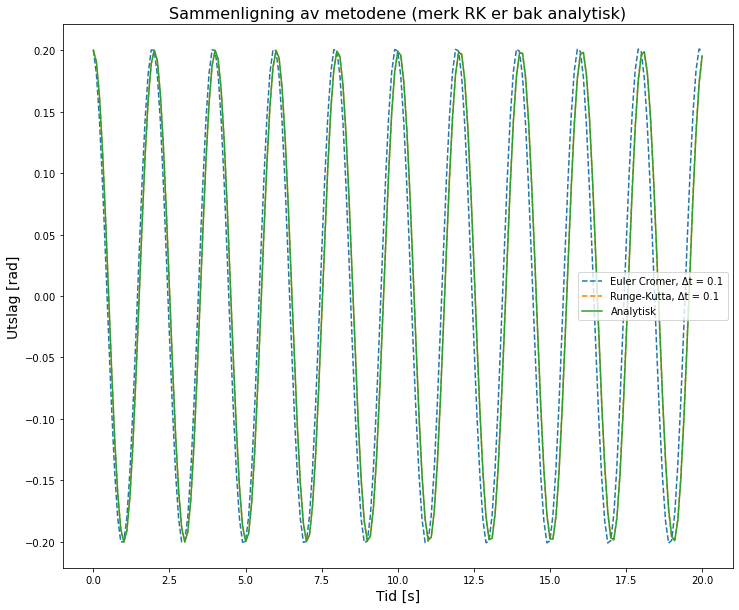

In [3]:
import numpy as np                # Importing numpy as np
import matplotlib.pyplot as plt   # Importing matplotlib.pyplot for plotting 
from scipy import integrate       # Importing integrate package from SciPy

%matplotlib inline

def euler_cromer_approx(theta_0, w_0, dt, T):
    """
    Calculates angular displacement and angular velocity 
    using the Euler-Cromer method 
    """
    N = int(T/dt)
    theta = np.zeros(N+1)
    w = np.zeros(N+1)
    t = np.linspace(0, T, N + 1)
    theta[0] = theta_0
    w[0] = w_0
    for i in range(N):
        w[i+1] = w[i] - g/l*theta[i]*dt
        theta[i+1] = theta[i] + w[i+1]*dt
    return theta, w, t

# RK5(4) method

def equation(t, vals):
    """
    Calculates the value of RHS of the differentail equations given an array (vals) which 
    contains the values of the parameters

    Parameters
    -----------
    t: float
    time
    
    vals: array
    values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    dw = -g/l*vals[0]
    dtheta = vals[1]
    return [dtheta, dw]

def RK45_method(equation, theta_0, w_0, dt, T):
    """
    Calculates the angular dispacement and angular velocity.
    
    Parameters
    ------------
    RHS: right hand side of the differentail equations
    
    theta_0: initial value of angular displacement
    
    w_0: initial value of the angular velocity
    
    T: time to calculate up to
    
    dt: timestep 
    """
    init_values = [theta_0, w_0]
    t_span = [0, T + dt]
    t = np.arange(0, T + dt, dt)
    theta12 = integrate.solve_ivp(equation, t_span, init_values, method = 'RK45', t_eval = t)
    theta = theta12.y[0, :]  # Array of angular displacements
    w = theta12.y[1, :]      # Array of angular velocities 
    t = theta12.t            # Array of times
    return theta, w, t 

# Parameters
m = 5           # [kg], mass
l = 1.0         # [m], length of pendulum string
g = 9.8         # |m/s^2], gravitational acceleration
theta_0 = 0.2   # [rad], initial angle wrt vertical
w_0 = 0.0       # [rad/s], initial angular velocity

# SKRIV KODE HER
dt = 0.1
T = 20

def analytisk_losning(theta_0, T):

    N = int(T/dt)
    theta = np.zeros(N+1)
    t = np.linspace(0, T, N + 1)
    theta[0] = theta_0
    
    theta = theta_0*np.cos(np.sqrt(g/l)*t)
    return theta, t

plt.figure(0)
plt.figure(figsize=(12,10))
plt.plot(euler_cromer_approx(theta_0, w_0, dt, T)[2], euler_cromer_approx(theta_0, w_0, dt, T)[0], '--', label="Euler Cromer, Δt = 0.1")
plt.plot(RK45_method(equation, theta_0, w_0, dt, T)[2], RK45_method(equation, theta_0, w_0, dt, T)[0], '--', label="Runge-Kutta, Δt = 0.1")
plt.plot(analytisk_losning(theta_0, T)[1], analytisk_losning(theta_0, T)[0], label="Analytisk")
plt.title('Sammenligning av metodene (merk RK er bak analytisk)', fontsize=16)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Utslag [rad]', fontsize=14)
plt.legend()
plt.show()

## Oppgave 2 – Konvergenstest for fjerdeordens Runge-Kutta-metoden

Fjerdeordens Runge-Kutta er en fjerdeordens numerisk metode for å løse ordinære differensialligninger. At det er en *fjerde ordens* metode, som vil si at feilen (totalt akkumulert) går som $\sim \Delta t^4$. Sammenlignet med f.eks. Euler-Cromer metoden, som er en første ordens metode, hvor feilen går som $\sim \Delta t$, vil vi kunne benytte et større tidssteg og oppnå lik feil. 



**a)** Vi skal nå implementere RK4-metoden for å løse differensialligninger. Du får utgitt kode som beregner ett steg i Runge-Kutta metoden i cella under. Skriv en funksjon som beregner utslagsvinkelen, $\theta$, og vinkelhastigheten, $\omega$, ved Runge-Kutta-metoden.

*Hint:* `RK4_step(theta, w, dt)` regner ut ett steg, så du må benytte en løkke hvor du beregner `n-1` steg for å finne vinkelutslaget.

In [29]:
# GIVEN FUNCTION

def k(theta):
    """
    Returns right-hand-side of eq.
    """
    return -g/l*theta

def f(w):
    """
    Returns right-hand-side of eq.
    """
    return w

def RK4_step(k, f, theta, w, dt):
    """
    Calculates one step of the RK4-algorithm.
    
    theta: float
    previous value of theta
           
    w: float
    previous value of w (omega, angular velocity)
    
    dt: float
    timestep
    
    return: two floats 
    """
    k1 = k(theta)
    f1 = f(w)
    k2 = k(theta + (dt/2)*f1)
    f2 = f(w + (dt/2)*k1)
    k3 = k(theta + (dt/2)*f2)
    f3 = f(w + (dt/2)*k2)
    k4 = k(theta + dt*f3)
    f4 = f(w + dt*k3)
    return theta + (dt/6)*(f1 + (2*f2) + (2*f3) + f4), w + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(k, f, theta_0, w_0, dt, T):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    k: RHS of equation
    f: RHS of equation
    theta0: initial value of theta
    w0: initail value of omega
    dt: timestep
    T: time to calculate up to
    
    return theta, w, t
    """
    
    # SKRIV KODE HER
    n = int(T/dt)
    theta = np.zeros(n+1)
    w = np.zeros(n+1)
    theta[0] = theta_0
    w[0] = w_0
    t = np.linspace(0, T, n + 1)
    
    for i in range(n):
        theta[i+1], w[i+1] = RK4_step(k, f, theta[i], w[i], dt)

    return theta, w, t

**b)** Benytt intitialbetingelsene og parametrene gitt tidligere, og plot vinkelutslaget $\theta$ som funksjon av tid, $t$, opp til $t = 20$ s. Bruk tidssteg $\Delta t = 0.01$ s.

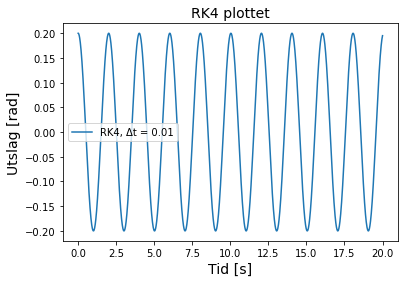

In [30]:
# SKRIV KODE HER
dt = 0.01
T = 20
theta, w, t = RK4_method(k, f, theta_0, w_0, dt, T) 

plt.figure(1)
plt.plot(t, theta, label="RK4, Δt = 0.01")
plt.title('RK4 plottet', fontsize=14)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Utslag [rad]', fontsize=14)
plt.legend()
plt.show()

**c)** Den totale energien til den enkle harmoniske pendelen er gitt ved (se programmeringsøving 1)

\begin{equation}
 	E = E_k + E_p = \frac{1}{2} m l^2 \omega^2 + \frac{1}{2} mgl\theta^2.
	\label{eq:energy}
\end{equation}

Plot den kinetiske energien, den potensielle energien og total energi som funksjon av tid i samme figur. Bruk fjerde-ordens Runge-Kutta metoden med tidssteg $\Delta t = 0.01$ s. 

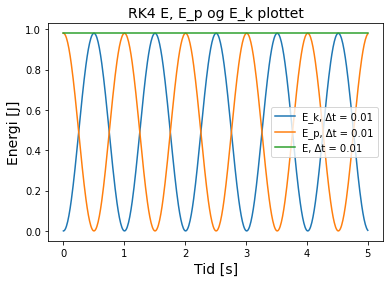

In [42]:
# SKRIV KODE HER
dt = 0.01
T = 5 #endret på T så det var lettere å se 

theta, w, t = RK4_method(k, f, theta_0, w_0, dt, T) 

E_k = (1/2)*m*l**2*w**2
E_p = (1/2)*m*g*l*theta**2

plt.figure(2)
plt.plot(t, E_k, label="E_k, Δt = 0.01")
plt.plot(t, E_p, label="E_p, Δt = 0.01")
plt.plot(t, (E_k + E_p), label="E, Δt = 0.01")
plt.title('RK4 E, E_p og E_k plottet', fontsize=14)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Energi [J]', fontsize=14)
plt.legend()
plt.show()

**d)** Vi skal nå utføre *konvergenstest*. Vi vet at for å ha en fysisk løsning på systemet, må energien være konstant. Dette kan vi bruke for å finne et kvantitativt mål på nøyaktigheten til de numeriske metodene for ulike tidssteg. Altså, vi kan derfor beregne hvor mye energien har endret seg fra starten til slutten av tidsintervallet, for hvert tidssteg.

Utfør en konvergenstest av RK4 ved å skrive en funksjon som beregner energidifferansen mellom start- og sluttid. Velg tidssteg mellom $\Delta t_\text{start} = 0.001$ s og $\Delta t_\text{slutt} = 0.1$ s, og stegdifferanse $\Delta_\text{steg} = 0.001$ s. Plot resultatet med tidssteget $\Delta t$ på $x$-aksen og energidifferansen $\Delta_E = |E(t=t_\mathrm{max}) - E(t=0)|$ på $y$-aksen. (Utfør gjerne konvergensten for de andre numeriske metodene også.)

*Hint:* Lag en for-løkke som itererer over $\Delta t$ verdiene, og kjører `RK4_method`-funksjonen for hvert tidssteg.

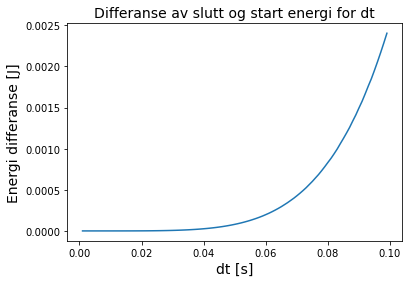

In [44]:
# SKRIV KODE HER
T = 20
dt = np.arange(0.001, 0.1, 0.001)
diff = np.zeros(len(dt))

for i in range(len(dt)):
    theta, w, t = RK4_method(k, f, theta_0, w_0, dt[i], T)
    E = ((1/2)*m*l**2*w**2 + (1/2)*m*g*l*theta**2)
    diff[i] = abs(E[-1] - E[0])

plt.figure(3)
plt.plot(dt, diff)
plt.title('Differanse av slutt og start energi for dt', fontsize=14)
plt.xlabel('dt [s]', fontsize=14)
plt.ylabel('Energi differanse [J]', fontsize=14)
plt.show()

## Ekstraoppgave (frivillig) – Flyttall-feil

Flyttall-feil oppstår når datamaskiner ikke klarer å representere tall med stor nok presisjon. Dette skjer blant annet fordi datamaskiner bruker et binært tallsystem (med 0 og 1). Selv om vi som regel ikke har behov for å tenke mye på flyttall-feil, kan de oppstå når du minst venter det. F.eks. når du trekker store og små tall fra hverandre i Python, eller hvis du prøver å representere et irrasjonelt tall eller tall med "uendelig" mange desimaler på en datamaskin. Et eksempel er $\pi$, som ikke kan representeres helt nøyaktig, selv med all lagringskapasitet i universet. 

### Frivillig arbeidskrav:

- Bruk Numpy og lag en variabel `sin_val` som er lik $\sin(2\pi)$ og en variabel kalt `cos_val` som er lik $\cos(2\pi)$.
- Print `sin_val` minus `cos_val`. Hva er svaret? Er det det du forventer?
- Lag en ny variabel som heter `sin_n_cos` som er lik $\sin(0) - \cos(0)$.
- Print `sin_n_cos`. Er dette resultatet som du forventer? Er det det samme som for `sin_val` minus `cos_val`?
- Print `sin_n_cos` minus `sin_val` pluss `cos_val`. Får du null som svar?
- Vis at $\sin(x)/(1 + \cos(x)) = (1 - \cos(x))/\sin(x)$.
- Lag to funksjoner `trig1` og `trig2` som regner ut $\sin(x)/(1 + \cos(x))$ og $(1 - \cos(x))/\sin(x)$.
- Plot `trig1` minus `trig2` for 100 verdier mellom 2 og 4. Er resultatet 0 for alle verdier mellom 2 og 4?
- Plot `trig1` for de samme verdiene som brukt ovenfor. Ser du noen likhet mellom `trig1` og `trig1` minus `trig2`?

In [ ]:
def RHS(t, vals): # vals is an array with theta in the [0] spot and, and omega in the [1] spot.
    
    dw = impetus*np.sin(w_D*t) - (q*vals[1]) - ((g/l)*vals[0])
    dtheta = impetus*np.sin(w_D*t) - ((g/l)*vals[0]) - dw # or it is possible to replace with just vals[1]
    
    return [dtheta, dw]

def RK45_method(RHS, theta_0, w_0, dt, T):
 
    init_values = [theta_0, w_0]
    t_span = [0, T + dt]
    t = np.arange(0, T + dt, dt)
    
    theta12 = integrate.solve_ivp(RHS, t_span, init_values, method = 'RK45', t_eval = t)
    
    theta = theta12.y[0, :] 
    w = theta12.y[1, :]       
    t = theta12.t   
    
    return theta, w, t 

# Parameters          
l = 1.0         
g = 9.8  
impetus = 0.2 # actually F_d/(m*l)
w_D = 3.13
q = 1

theta_0 = 0.2   
w_0 = 0.0 

dt = 0.01
T = 20

plt.figure(4)
plt.plot(RK45_method(equation, theta_0, w_0, dt, T)[2], RK45_method(equation, theta_0, w_0, dt, T)[0])
plt.title('Runge-Kutta, Δt = 0.01', fontsize=14)
plt.xlabel('Tid [s]', fontsize=14)
plt.ylabel('Utslag [rad]', fontsize=14)
plt.show()